In [1]:
import tensorflow as tf
import pickle
import re
import os
import numpy as np
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2

from tensorflow.keras.applications import VGG16,ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input

from AdversarialImage.Generator import AdversarialGenerator
from AdversarialImage.Noise import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
gen = AdversarialGenerator()

In [6]:
vgg16 = VGG16(weights='imagenet')
# resnet50 = ResNet50(weights="imagenet",include_top=True)
# model.summary()

In [7]:
path = "/kaggle/input/imagenet/imagenet/val/"

def imagenet_gen(path,batch_size,image_size=(224,224)):
    images = os.listdir(path)
    while True:
        random.shuffle(images)
        batch_images=[]
        for i in range(0,batch_size):
            img = tf.io.read_file(f"{path}{images[i]}")
            img = tf.io.decode_image(img,channels=3)
#             img = tf.cast(img,dtype=tf.float32)
            img = tf.image.resize(img,(224,224))
#             img *= 1/255 
            batch_images.append(img)
        yield tf.convert_to_tensor(batch_images)

In [8]:
train_gen = imagenet_gen(path,32)

In [9]:
temp = next(train_gen)

In [10]:
temp = vgg_preprocess_input(temp)

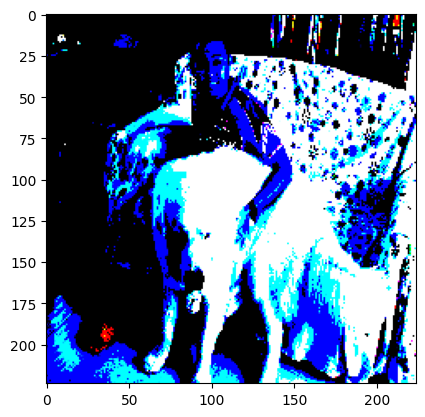

In [11]:
plt.imshow(temp[10])

In [12]:
noise = gen.generate_adversarial_image(temp,method="uniform",low=-0.007,high=0.007,out="img")

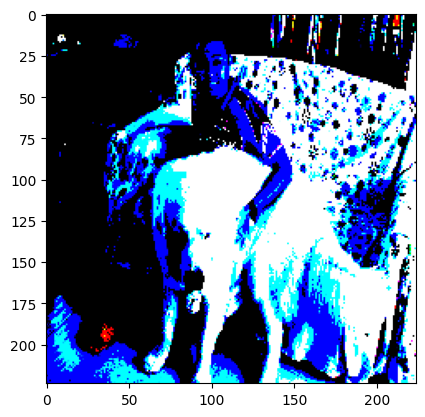

In [13]:
plt.imshow(noise[10])

In [14]:
noise_pred = vgg16.predict(noise)

1/1 [==============================] - 7s 7s/step


In [15]:
img_pred= vgg16.predict(temp)

1/1 [==============================] - 0s 39ms/step


In [16]:
tf.argmax(noise_pred,axis=-1)

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([794, 669, 669, 669, 669, 669, 669,  58, 669, 669, 669, 669, 669,
       669, 669, 669, 669, 669, 549, 549, 669, 999, 669, 669, 669, 669,
       669, 669, 669, 669, 669, 669])>

In [17]:
tf.argmax(img_pred,axis=-1)

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([599, 296, 708, 850, 896, 848, 677, 372, 877,  95, 427, 226, 501,
       722, 307, 844, 658, 853, 769, 868, 794, 710, 302, 771, 164,  99,
       154, 905, 676, 492, 887, 111])>

above shows that adversarial image attack to be success, as us human can`t even see any changes in the image, but the model, in this case VGG16 are not predict the adversarial image correctly.